In [3]:
print("hello")
print("hello")

hello
hello


In [4]:
import pandas as pd

# Importing the data


In [5]:
dataframe = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding the dataset

In [6]:
dataframe.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
dataframe.shape


(7043, 21)

In [8]:
dataframe.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Data Cleaning 

In [9]:
dataframe.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
dataframe.duplicated().sum()

0

# Creation of input output features

In [11]:
features = dataframe.drop('Churn', axis=1)
target = dataframe['Churn']

In [12]:
features

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6


In [13]:
target

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

## Conversion of features into numeric values

In [14]:
# Label encoding
map_target = {'Yes': 1, 'No': 0}
target = [map_target[i] for i in target]
target

[0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = dataframe['Churn']
target = encoder.fit_transform(target)
target

array([0, 0, 1, ..., 0, 1, 0])

In [16]:
# One-hot encoding the data using pandas get_dummies

# List of categorical columns
categorical_columns = features.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    features[col] = features[col].astype('category')

features.dtypes

customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges        category
dtype: object

In [17]:
features = pd.get_dummies(features)
features

,SeniorCitizen,tenure,MonthlyCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,0,72,103.20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,0,11,29.60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,1,4,74.40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Scaling of the features

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(features)

features_minmax


array([[0.        , 0.01388889, 0.11542289, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.47222222, 0.38507463, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02777778, 0.35422886, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.15277778, 0.11293532, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.05555556, 0.55870647, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.91666667, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_standard = scaler.fit_transform(features)

features_standard

array([[-0.43991649, -1.27744458, -1.16032292, ..., -0.01191659,
        -0.01191659, -0.01191659],
       [-0.43991649,  0.06632742, -0.25962894, ..., -0.01191659,
        -0.01191659, -0.01191659],
       [-0.43991649, -1.23672422, -0.36266036, ..., -0.01191659,
        -0.01191659, -0.01191659],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 , ..., -0.01191659,
        -0.01191659, -0.01191659],
       [ 2.27315869, -1.15528349,  0.32033821, ..., -0.01191659,
        -0.01191659, -0.01191659],
       [-0.43991649,  1.36937906,  1.35896134, ..., -0.01191659,
        -0.01191659, -0.01191659]])

In [20]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_features(features):


    one_hot_columns = features.select_dtypes(include=['bool']).columns.tolist()
    numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_columns_ = [col for col in numeric_columns if col not in one_hot_columns]
    
    # Prompt the user for scaling choice
    print("Choose a scaling method:")
    print("Choose carefully based on the model you plan to use. Your one wise decision can change the world and save the time to sleep. :)")
    print("1. MinMaxScaler (scales values between 0 and 1, useful for neural networks and when data is bounded)")
    print("2. StandardScaler (scales values with mean 0 and standard deviation 1, useful for linear models like linear regression, logistic regression, and principal component analysis)")
    
    choice = input("Enter 1 for MinMaxScaler or 2 for StandardScaler: ")

    print("You chose:", choice)
    
    if choice == '1':
        # Apply MinMaxScaler
        scaler = MinMaxScaler()
        scaled_features = scaler.fit_transform(features[numeric_columns_])
        print("MinMaxScaler applied.")
        
    elif choice == '2':
        # Apply StandardScaler
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features[numeric_columns_])
        print("StandardScaler applied.")
        
    else:
        print("Invalid input. Please enter 1 or 2.")
        return None
    
    # Create a DataFrame of scaled features
    scaled_features_dataframe = pd.DataFrame(scaled_features, columns=numeric_columns_)

    # Add the one-hot encoded columns to the scaled features DataFrame
    scaled_features_dataframe = pd.concat([scaled_features_dataframe, features[one_hot_columns].reset_index(drop=True)], axis=1)
    
    return scaled_features_dataframe



scaled_features_df = scale_features(features)

# Now `scaled_features_df` contains the scaled features
print(scaled_features_df.head())


Choose a scaling method:
Choose carefully based on the model you plan to use. Your one wise decision can change the world and save the time to sleep. :)
1. MinMaxScaler (scales values between 0 and 1, useful for neural networks and when data is bounded)
2. StandardScaler (scales values with mean 0 and standard deviation 1, useful for linear models like linear regression, logistic regression, and principal component analysis)
You chose: 1
MinMaxScaler applied.
   SeniorCitizen    tenure  MonthlyCharges  customerID_0002-ORFBO  \
0            0.0  0.013889        0.115423                  False   
1            0.0  0.472222        0.385075                  False   
2            0.0  0.027778        0.354229                  False   
3            0.0  0.625000        0.239303                  False   
4            0.0  0.027778        0.521891                  False   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False

In [21]:
features.dtypes

SeniorCitizen              int64
tenure                     int64
MonthlyCharges           float64
customerID_0002-ORFBO       bool
customerID_0003-MKNFE       bool
                          ...   
TotalCharges_997.75         bool
TotalCharges_998.1          bool
TotalCharges_999.45         bool
TotalCharges_999.8          bool
TotalCharges_999.9          bool
Length: 13618, dtype: object

# Correlation Analysis


In [22]:
# features_df = pd.DataFrame(features_minmax, columns=features.columns)
features_df = scale_features(features)
target_df = pd.DataFrame(target, columns=['Churn'])

#correlation analysis of features with the target
target_series = target_df['Churn']
correlation = features_df.corrwith(target_series)
correlation

Choose a scaling method:
Choose carefully based on the model you plan to use. Your one wise decision can change the world and save the time to sleep. :)
1. MinMaxScaler (scales values between 0 and 1, useful for neural networks and when data is bounded)
2. StandardScaler (scales values with mean 0 and standard deviation 1, useful for linear models like linear regression, logistic regression, and principal component analysis)
You chose: 1
MinMaxScaler applied.


SeniorCitizen            0.150889
tenure                  -0.352229
MonthlyCharges           0.193356
customerID_0002-ORFBO   -0.007162
customerID_0003-MKNFE   -0.007162
                           ...   
TotalCharges_997.75     -0.007162
TotalCharges_998.1      -0.007162
TotalCharges_999.45      0.019827
TotalCharges_999.8      -0.007162
TotalCharges_999.9      -0.007162
Length: 13618, dtype: float64

In [23]:
# correlation matrix of features with the target
correlation_matrix = features_df.corrwith(target_series)
correlation_matrix

SeniorCitizen            0.150889
tenure                  -0.352229
MonthlyCharges           0.193356
customerID_0002-ORFBO   -0.007162
customerID_0003-MKNFE   -0.007162
                           ...   
TotalCharges_997.75     -0.007162
TotalCharges_998.1      -0.007162
TotalCharges_999.45      0.019827
TotalCharges_999.8      -0.007162
TotalCharges_999.9      -0.007162
Length: 13618, dtype: float64

In [24]:
target


array([0, 0, 1, ..., 0, 1, 0])

In [25]:
# Get absolute values of correlations
abs_correlation = correlation.abs()

# Sort by absolute correlation values in descending order
sorted_features = abs_correlation.sort_values(ascending=False)

# Select the top 20 features
top_20_features = sorted_features.head(20)

print("Top 20 features based on absolute correlation with the target:")
print(top_20_features)

Top 20 features based on absolute correlation with the target:
Contract_Month-to-month                 0.405103
tenure                                  0.352229
OnlineSecurity_No                       0.342637
TechSupport_No                          0.337281
InternetService_Fiber optic             0.308020
Contract_Two year                       0.302253
PaymentMethod_Electronic check          0.301919
OnlineBackup_No                         0.268005
DeviceProtection_No                     0.252481
TechSupport_No internet service         0.227890
OnlineBackup_No internet service        0.227890
OnlineSecurity_No internet service      0.227890
InternetService_No                      0.227890
DeviceProtection_No internet service    0.227890
StreamingTV_No internet service         0.227890
StreamingMovies_No internet service     0.227890
MonthlyCharges                          0.193356
PaperlessBilling_Yes                    0.191825
PaperlessBilling_No                     0.191825
Contra

# Logistic Regression

In [26]:
import numpy as np
from typing import List, Tuple

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.asarray(z)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        return (y_pred > 0.5).astype(int)
    
    def predict_proba(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_pred)

        return np.column_stack((1 - probabilities, probabilities))
    
    def predict_log_proba(self, X):
        probabilities = self.predict_proba(X)
        log_probabilities = np.log(probabilities)
        return log_probabilities

# Evaluation Metrics


In [46]:

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, confusion_matrix)

def evaluate_model(y_true, y_pred, y_prob):
    #Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    #Metrics
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auroc = roc_auc_score(y_true, y_prob)
    aupr = average_precision_score(y_true, y_prob)


    return {
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1 Score': f1,
        'AUROC': auroc,
        'AUPR': aupr
    }


from colorama import Fore, Style

def print_metrics(metrics, ensemble_name):
    """
    Prints the evaluation metrics with a colored heading.

    Parameters:
    - metrics (dict): A dictionary where keys are metric names and values are metric values.
    - ensemble_name (str): The name of the ensemble to display as a header.
    """
    # Box drawing characters
    box_horizontal = "─"
    box_vertical = "│"
    box_top_left = "┌"
    box_top_right = "┐"
    box_bottom_left = "└"
    box_bottom_right = "┘"

    # Calculate the width of the box
    max_metric_length = max(len(f"{metric}: {value:.4f} ± {value:.4f}") for metric, value in metrics.items())
    box_width = max_metric_length + 5  # Extra space for padding and vertical lines

    # Create the box
    print(f"{Fore.MAGENTA}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{Style.RESET_ALL}")

    # Print the header
    print(f"{Fore.GREEN}{Style.BRIGHT}{box_vertical} Evaluation metrics for the {ensemble_name} ensemble: {box_vertical}{Style.RESET_ALL}")

    print(f"{Fore.MAGENTA}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{Style.RESET_ALL}")

    # Print each metric in a formatted way
    for metric, value in metrics.items():
        print(f"{Fore.GREEN}{box_vertical} {metric}: {value:.4f} \t\t {box_vertical}{Style.RESET_ALL}")

    # Bottom of the box
    print(f"{Fore.MAGENTA}{box_bottom_left}{box_horizontal * (box_width - 2)}{box_bottom_right}{Style.RESET_ALL}")






def print_LR_metrics(metrics_df):
    avg_metrics = metrics_df.mean()
    std_metrics = metrics_df.std()

    # ANSI escape codes for pink and box drawing
    pink_color = "\033[95m"
    reset_color = "\033[0m"
    green_color = "\033[92m"
    box_horizontal = "─"
    box_vertical = "│"
    box_top_left = "┌"
    box_top_right = "┐"
    box_bottom_left = "└"
    box_bottom_right = "┘"

    # Create the box
    box_width = max(len(metric) for metric in avg_metrics.index) + 30  # Adjust for metrics label length
    print(f"{pink_color}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{reset_color}")

    print(f"{green_color}{box_vertical} Evaluation metrics for the 9 Bagging LR learners (average ± stdev): {box_vertical}{reset_color}")

    print(f"{pink_color}{box_top_left}{box_horizontal * (box_width - 2)}{box_top_right}{reset_color}")

    for metric in avg_metrics.index:
        print(f"{green_color}{box_vertical} {metric}: {avg_metrics[metric]:.4f} ± {std_metrics[metric]:.4f} \t\t {box_vertical}{reset_color}")

    print(f"{pink_color}{box_bottom_left}{box_horizontal * (box_width - 2)}{box_bottom_right}{reset_color}")







# Validating the pipeline


In [28]:
import numpy as np
# from sklearn.linear_model import LogisticRegression
# from LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def validatePipeline(features_df, target_df):
    # considering all the columns as features
    X = features_df.to_numpy()  # Convert the feature DataFrame to a NumPy array
    Y = target_df['Churn'].to_numpy()  # Convert the target column to a NumPy array

    

    # Step 1: Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Step 2: Initialize the Logistic Regression Classifier
    clf = LogisticRegression()

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 3: Train the classifier on the training data
    clf.fit(X_train, Y_train)

    # Step 4: Make predictions on the test data
    y_pred = clf.predict(X_test)

    y_prob = clf.predict_proba(X_test)

    # Step 5: Evaluate the classifier's performance
    accuracy = accuracy_score(Y_test, y_pred)

    print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

    print(Y_test.shape, y_pred.shape, y_prob.shape)

    # Evaluate the model
    metrics_lr = evaluate_model(Y_test, y_pred, y_prob[:, 1])

    print("Evaluation metrics for the Logistic Regression model:")
    print(pd.DataFrame([metrics_lr]))


# `scaled_features_df` is the preprocessed feature DataFrame and `target_df` contains the target values
validatePipeline(scaled_features_df, target_df)


Accuracy of Logistic Regression classifier: 0.81
(1409,) (1409,) (1409, 2)
Evaluation metrics for the Logistic Regression model:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC      AUPR
0  0.805536      0.44504     0.935328   0.712446  0.547855  0.848962  0.646419


In [29]:
import numpy as np
# from sklearn.linear_model import LogisticRegression
# from LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, confusion_matrix)

def validatePipeline(features_df, target_df, top_20_features):
    # considering only the top 20 features according to the correlation analysis
    X = features_df[top_20_features.index].to_numpy()  # Convert the feature DataFrame to a NumPy array
    Y = target_df['Churn'].to_numpy()  # Convert the target column to a NumPy array

    # Step 1: Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Initialize the Logistic Regression Classifier
    clf = LogisticRegression()

    # Step 3: Train the classifier on the training data
    clf.fit(X_train, Y_train)

    # Step 4: Make predictions on the test data
    y_pred = clf.predict(X_test)

    y_prob = clf.predict_proba(X_test)

    # Step 5: Evaluate the classifier's performance
    accuracy = accuracy_score(Y_test, y_pred)

    print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")

    # Evaluate the model
    metrics_lr = evaluate_model(Y_test, y_pred, y_prob[:, 1])

    print("Evaluation metrics for the Logistic Regression model:")
    print(pd.DataFrame([metrics_lr]))



validatePipeline(features_df, target_df, top_20_features)

Accuracy of Logistic Regression classifier: 0.78
Evaluation metrics for the Logistic Regression model:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC      AUPR
0  0.781405     0.270777     0.965251   0.737226  0.396078  0.841276  0.653978


# Bagging Stacking


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier


class BaggingClassifier:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimators = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            estimator = self.base_estimator()
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]
            estimator.fit(X_sample, y_sample)
            self.estimators.append(estimator)

    def predict(self, X):
        predictions = np.array([est.predict(X) for est in self.estimators])
        return np.round(np.mean(predictions, axis=0)).astype(int)
    
    def predict_proba(self, X):
        probas = np.array([est.predict_proba(X) for est in self.estimators])
        return np.mean(probas, axis=0)
    


class StackingClassifier:
    def __init__(self, base_learners, meta_classifier):
        self.base_learners = base_learners
        self.meta_classifier = meta_classifier

    def fit(self, X, y):
        # Generate predictions from base learners
        base_preds = np.column_stack([base.predict_proba(X)[:, 1] for base in self.base_learners])
        # Fit meta-classifier on base learner predictions
        self.meta_classifier.fit(base_preds, y)

    def predict(self, X):
        base_preds = np.column_stack([base.predict_proba(X)[:, 1] for base in self.base_learners])
        return self.meta_classifier.predict(base_preds)

    def predict_proba(self, X):
        base_preds = np.column_stack([base.predict_proba(X)[:, 1] for base in self.base_learners])
        return self.meta_classifier.predict_proba(base_preds)

# Majority Voting Ensemble
class MajorityVotingClassifier:
    def __init__(self, base_learners):
        self.base_learners = base_learners
    
    def fit(self, X, y):
        for learner in self.base_learners:
            learner.fit(X, y)
    
    def predict(self, X):
        predictions = np.array([learner.predict(X) for learner in self.base_learners])
        return np.round(np.mean(predictions, axis=0)).astype(int)
    
    def predict_proba(self, X):
        probas = np.array([learner.predict_proba(X) for learner in self.base_learners])
        return np.mean(probas, axis=0)
    


def validateEnsemble(features_df, target_df):
    # Convert features and target to NumPy arrays
    X = features_df[top_20_features.index].to_numpy()
    y = target_df['Churn'].to_numpy()

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Train bagging models with Logistic Regression as base learners
    base_learner = LogisticRegression
    bagging_ensemble = BaggingClassifier(base_estimator=base_learner, n_estimators=9)
    bagging_ensemble.fit(X_train, y_train)


    #Evaluate each of the 9 bagging learners
    metrics_list = []
    for i, estimator in enumerate(bagging_ensemble.estimators):
        y_pred = estimator.predict(X_test)
        y_prob = estimator.predict_proba(X_test)[: ,1]
        metrics = evaluate_model(y_test, y_pred, y_prob)
        metrics_list.append(metrics)
        # print(f"Metrics for base learner {i+1}:")
        # print(pd.DataFrame([metrics]))
    
    
    metrics_df = pd.DataFrame(metrics_list)

    

    print_LR_metrics(metrics_df)

    # Step 3: Train stacking ensemble with Logistic Regression as meta-learner
    meta_classifier = LogisticRegression()
    stacking_ensemble = StackingClassifier(base_learners=bagging_ensemble.estimators, meta_classifier=meta_classifier)
    stacking_ensemble.fit(X_train, y_train)

    # Step 4: Train majority voting ensemble
    voting_ensemble = MajorityVotingClassifier(base_learners=bagging_ensemble.estimators)
    voting_ensemble.fit(X_train, y_train)

    # Step 5: Make predictions and calculate probabilities
    y_pred_bagging = bagging_ensemble.predict(X_test)
    y_prob_bagging = bagging_ensemble.predict_proba(X_test)

    y_pred_stacking = stacking_ensemble.predict(X_test)
    y_prob_stacking = stacking_ensemble.predict_proba(X_test)

    y_pred_voting = voting_ensemble.predict(X_test)
    # y_prob_voting = voting_ensemble.predict_proba(X_test)

    # Step 6: Evaluate the models
    metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_prob_bagging[:, 1])
    metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_prob_stacking[:, 1])
    metrics_voting = evaluate_model(y_test, y_pred_voting, y_pred_voting)  # Majority voting has no probas

    # Step 7: Compare the models
    print("Evaluation metrics for the Bagging ensemble:")
    print(pd.DataFrame([metrics_bagging]))
    print_metrics(metrics_bagging, "Bagging")
    

    print("Evaluation metrics for the Stacking ensemble:")
    print(pd.DataFrame([metrics_stacking]))
    print_metrics(metrics_stacking, "Stacking")

    print("Evaluation metrics for the Majority Voting ensemble:")
    print(pd.DataFrame([metrics_voting]))
    print_metrics(metrics_voting, "Voting")


validateEnsemble(features_df, target_df)

┌───────────────────────────────────────┐
│ Evaluation metrics for the 9 Bagging LR learners (average ± stdev): │
┌───────────────────────────────────────┐
│ Accuracy: 0.7804 ± 0.0068 		 │
│ Sensitivity: 0.2678 ± 0.0512 		 │
│ Specificity: 0.9649 ± 0.0095 		 │
│ Precision: 0.7360 ± 0.0158 		 │
│ F1 Score: 0.3897 ± 0.0526 		 │
│ AUROC: 0.8409 ± 0.0013 		 │
│ AUPR: 0.6529 ± 0.0018 		 │
└───────────────────────────────────────┘
Evaluation metrics for the Bagging ensemble:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC      AUPR
0  0.781405     0.270777     0.965251   0.737226  0.396078  0.841276  0.653978
┌───────────────────────────────┐
│ Evaluation metrics for the Bagging ensemble: │
┌───────────────────────────────┐
│ Accuracy: 0.7814 		 │
│ Sensitivity: 0.2708 		 │
│ Specificity: 0.9653 		 │
│ Precision: 0.7372 		 │
│ F1 Score: 0.3961 		 │
│ AUROC: 0.8413 		 │
│ AUPR: 0.6540 		 │
└───────────────────────────────┘
Evaluation metrics for the Stacking ensemble:
   

/home/sobaha/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Violin Graph

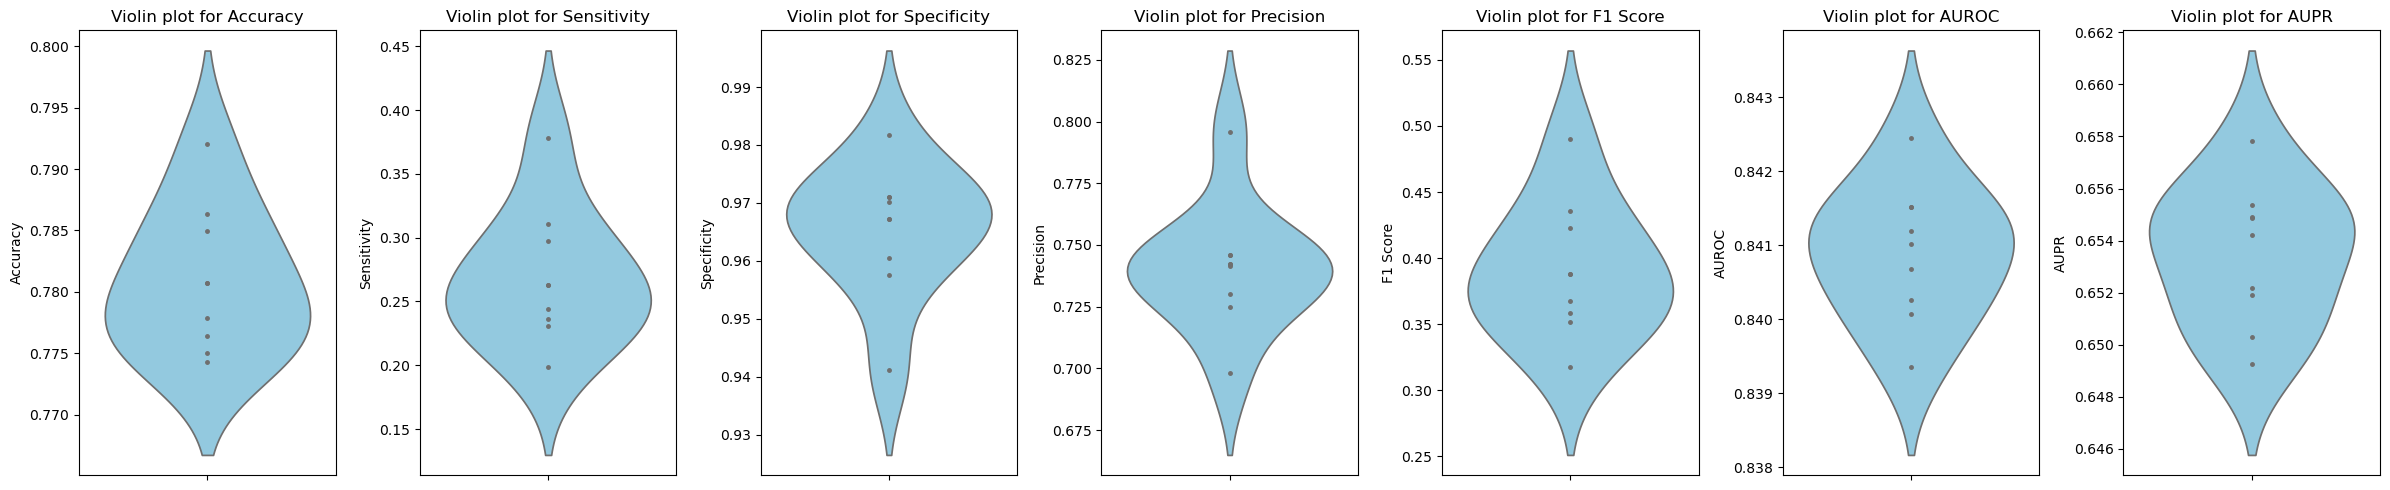

Evaluation metrics for the Bagging ensemble:
   Accuracy  Sensitivity  Specificity  Precision  F1 Score     AUROC      AUPR
0  0.779276     0.254692     0.968147   0.742188  0.379242  0.840823  0.653836


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


def validateEnsembleViolin(features_df, target_df):
    # Convert features and target to NumPy arrays
    X = features_df[top_20_features.index].to_numpy()
    y = target_df['Churn'].to_numpy()

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Train bagging models with Logistic Regression as base learners
    base_learner = LogisticRegression
    bagging_ensemble = BaggingClassifier(base_estimator=base_learner, n_estimators=9)
    bagging_ensemble.fit(X_train, y_train)


    metrics_list = []

    for est in bagging_ensemble.estimators:
        y_pred = est.predict(X_test)
        y_prob = est.predict_proba(X_test)
        metrics = evaluate_model(y_test, y_pred, y_prob[:, 1])
        metrics_list.append(metrics)


    metrics_df = pd.DataFrame(metrics_list)

    plt.figure(figsize=(24, 5))

    for i, metric in enumerate(metrics_df.columns, 1):
        plt.subplot(1, 7, i)
        sns.violinplot(data=metrics_df[metric], inner="point", color="skyblue")
        plt.title(f"Violin plot for {metric}")
        plt.ylabel(metric)

    plt.tight_layout()
    plt.show()




    # # Step 3: Train stacking ensemble with Logistic Regression as meta-learner
    # meta_classifier = LogisticRegression()
    # stacking_ensemble = StackingClassifier(base_learners=bagging_ensemble.estimators, meta_classifier=meta_classifier)
    # stacking_ensemble.fit(X_train, y_train)

    # # Step 4: Train majority voting ensemble
    # voting_ensemble = MajorityVotingClassifier(base_learners=bagging_ensemble.estimators)
    # voting_ensemble.fit(X_train, y_train)

    # Step 5: Make predictions and calculate probabilities
    y_pred_bagging = bagging_ensemble.predict(X_test)
    y_prob_bagging = bagging_ensemble.predict_proba(X_test)

    # y_pred_stacking = stacking_ensemble.predict(X_test)
    # y_prob_stacking = stacking_ensemble.predict_proba(X_test)

    # y_pred_voting = voting_ensemble.predict(X_test)
    # # y_prob_voting = voting_ensemble.predict_proba(X_test)

    # # Step 6: Evaluate the models
    metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_prob_bagging[:, 1])
    # metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_prob_stacking[:, 1])
    # metrics_voting = evaluate_model(y_test, y_pred_voting, y_pred_voting)  # Majority voting has no probas

    # Step 7: Compare the models
    print("Evaluation metrics for the Bagging ensemble:")
    print(pd.DataFrame([metrics_bagging]))

    # print("Evaluation metrics for the Stacking ensemble:")
    # print(pd.DataFrame([metrics_stacking]))

    # print("Evaluation metrics for the Majority Voting ensemble:")
    # print(pd.DataFrame([metrics_voting]))


validateEnsembleViolin(features_df, target_df)

In [32]:
def validateEnsemble(features_df, target_df):
    # Convert features and target to NumPy arrays
    X = features_df.to_numpy()
    y = target_df['Churn'].to_numpy()

    # Step 1: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert to float64 to avoid type issues
    X_train = X_train.astype(np.float64)
    X_test = X_test.astype(np.float64)

    # Step 2: Train bagging models with Logistic Regression as base learners
    base_learner = LogisticRegression
    bagging_ensemble = BaggingClassifier(base_estimator=base_learner, n_estimators=9)
    bagging_ensemble.fit(X_train, y_train)

    # Step 3: Train stacking ensemble with Logistic Regression as meta-learner
    meta_classifier = LogisticRegression()
    stacking_ensemble = StackingClassifier(base_learners=bagging_ensemble.estimators, meta_classifier=meta_classifier)
    stacking_ensemble.fit(X_train, y_train)

    # Step 4: Train majority voting ensemble
    voting_ensemble = MajorityVotingClassifier(base_learners=bagging_ensemble.estimators)
    voting_ensemble.fit(X_train, y_train)

    # Step 5: Make predictions and calculate probabilities
    y_pred_bagging = bagging_ensemble.predict(X_test)
    y_prob_bagging = bagging_ensemble.predict_proba(X_test)

    y_pred_stacking = stacking_ensemble.predict(X_test)
    y_prob_stacking = stacking_ensemble.predict_proba(X_test)

    y_pred_voting = voting_ensemble.predict(X_test)
    # y_prob_voting = voting_ensemble.predict_proba(X_test)

    # Step 6: Evaluate the models
    metrics_bagging = evaluate_model(y_test, y_pred_bagging, y_prob_bagging[:, 1])
    metrics_stacking = evaluate_model(y_test, y_pred_stacking, y_prob_stacking[:, 1])
    metrics_voting = evaluate_model(y_test, y_pred_voting, y_pred_voting)  # Majority voting has no probas

    # Step 7: Compare the models
    print("Evaluation metrics for the Bagging ensemble:")
    print(pd.DataFrame([metrics_bagging]))

    print("Evaluation metrics for the Stacking ensemble:")
    print(pd.DataFrame([metrics_stacking]))

    print("Evaluation metrics for the Majority Voting ensemble:")
    print(pd.DataFrame([metrics_voting]))


validateEnsemble(features_df, target_df)

KeyboardInterrupt: 